# Jane Chinwuko
# Batch number: DS2307

This dataset is the Medical Cost Personal Insurance.

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns                                            
•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance


In [1]:
# Imported necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loaded the dataset to a Pandas DataFrame
med_cost = pd.read_csv('medical_cost_insurance.csv')

## Exploratory Data Analysis

In [3]:
# Viewing the dimensions of the array
med_cost.shape

(1338, 7)

This dataset contains 1338 rows and 7 columns (made up of the independent and target variables)

In [4]:
#Viewing the first 10 rows of the dataset
med_cost.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
#Viewing the last 10 rows of the dataset
med_cost.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [6]:
#Viewing the columns present in the dataset
columns = med_cost.columns
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

We have 4 categorical variables. They are sex, children, smoker and region. While age, bmi. charges are numerical variables.

In [7]:
#Displays the basic information about the columns in the dataset
med_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The datatypes present in our dataset are int64(2 variables), object(3 variables) and float64(2 variables)

In [8]:
#Generating the descriptive statistics of all the features in the dataset
med_cost.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


From the above, we can see that the counts are same, so no null values present in our dataset. The difference between the maximum and the 75% percentile value of the charges column is  large. We need to check for outliers.

In [9]:
#This returns the count of unique occurrences in the sex column.
med_cost['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

We have more males clients than female

In [10]:
#This returns the count of unique occurrences in the smoker column.
med_cost['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

We have more non smokers than smokers

In [11]:
#This returns the count of unique occurrences in the region column.
med_cost['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

More clients are from the southeast

In [12]:
# Printing the total number of duplicates across all the columns
duplicated = med_cost.duplicated()

print("The number of duplicates in the dataset is:", med_cost.duplicated().sum())

The number of duplicates in the dataset is: 1


In [13]:
#display of some of the duplicates
med_cost[duplicated]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [14]:
#Removing the duplicates
med_cost.drop_duplicates(inplace=True)

In [15]:
# Printing the total number of duplicates across all the columns
duplicated = med_cost.duplicated()

print("The number of duplicates in the dataset is:", med_cost.duplicated().sum())

The number of duplicates in the dataset is: 0


In [16]:
#Displays the unique value for the features in the dataset
med_cost.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [17]:
#checking for missing values
med_cost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values in our dataset

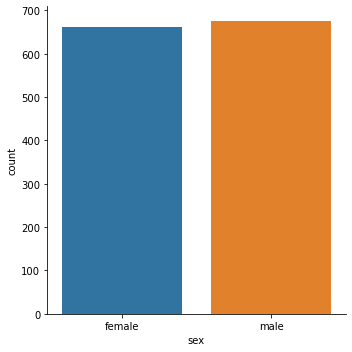

In [18]:
# This catplot shows the distribution of sex.
sns.catplot(x ='sex', data = med_cost, kind = 'count')

From the plot above, we can see that we have more of male than female. It could be that men are more likely than women to experience health problems.

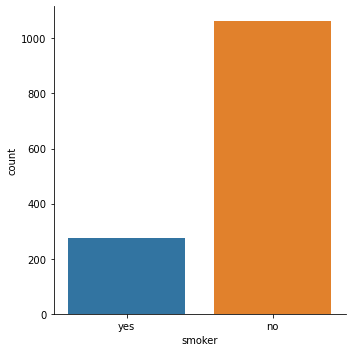

In [19]:
# This catplot shows the distribution of smokers.
sns.catplot(x ='smoker', data = med_cost, kind = 'count')

From the plot above, we can see that most of the clients are non smokers.

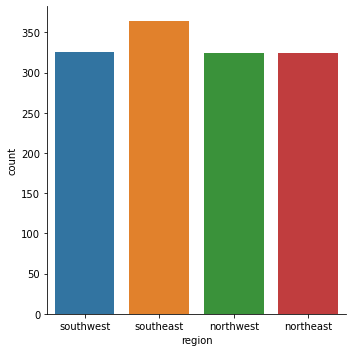

In [20]:
# This catplot shows the distribution of region
sns.catplot(x ='region', data = med_cost, kind = 'count')

For the region, we can see that southwest, northwest and northeast have very close values count

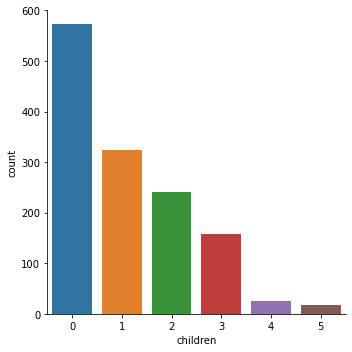

In [21]:
# This catplot shows the distribution of children.
sns.catplot(x ='children', data = med_cost, kind = 'count')

This shows that most of the clients do not have children.

<Figure size 504x504 with 0 Axes>

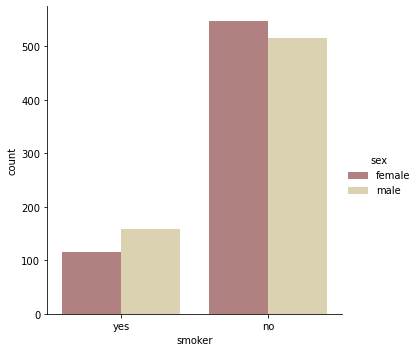

In [22]:
plt.figure(figsize=(7,7))
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=med_cost);

We have more male smokers than female. 
We have more female that are non smoker than male.

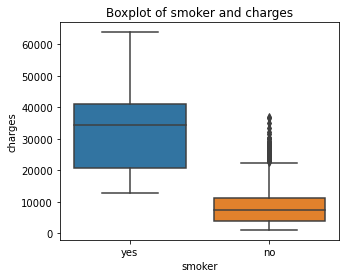

In [23]:
plt.figure(figsize=(5,4))
sns.boxplot(data=med_cost, x='smoker',y='charges')
plt.title("Boxplot of smoker and charges")
plt.show()

From the boxplot, we can see that those that smoke pay more than non smokers.

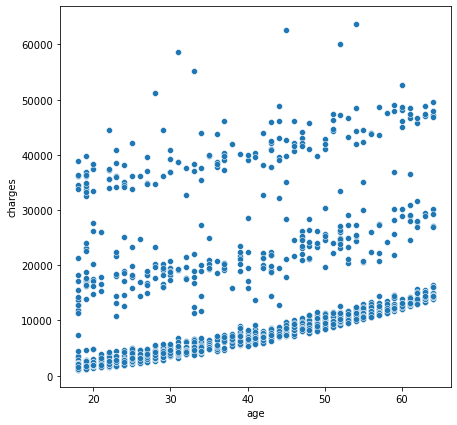

In [24]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=med_cost, x='age', y='charges', palette="flare");

From the scatterplot between charges and age, we can ses that as the age increases, the charges increase too. This then means that the expense of medical care rises as people age, regardless of the degree of medical insurance they have.

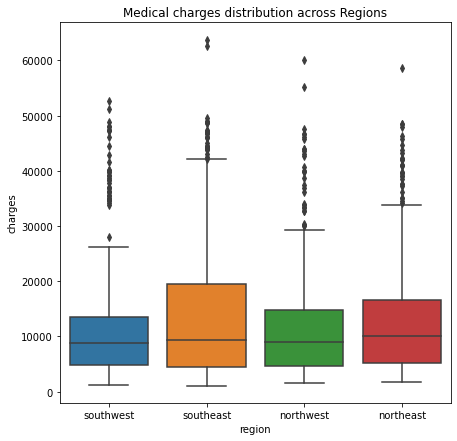

In [25]:
plt.figure(figsize=(7,7))
sns.boxplot(x='region', y='charges', data=med_cost)
plt.title('Medical charges distribution across Regions')
plt.show()

Medical expenses in the Southeast are slightly higher than in other regions.

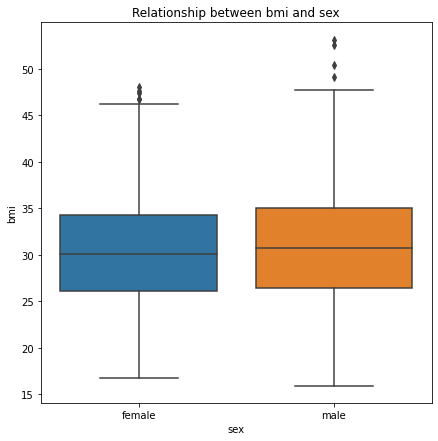

In [26]:
plt.figure(figsize=(7,7))
sns.boxplot(x='sex', y='bmi', data=med_cost)
plt.title('Relationship between bmi and sex')
plt.show()

From the boxplot, we can see that male have slightly highers bmi than female. 

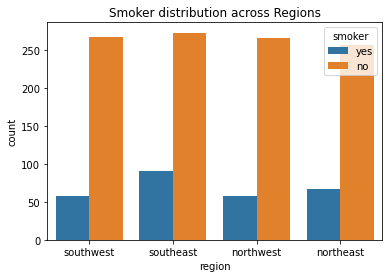

In [27]:
sns.countplot(x='region', hue='smoker', data=med_cost)
plt.title('Smoker distribution across Regions')
plt.show()

There doesn't appear to be a particularly high or low rate in any one region for non smokers. The southeast has the greatest smoking rates, while the southwest and northwest have the lowest rates.

<Figure size 504x504 with 0 Axes>

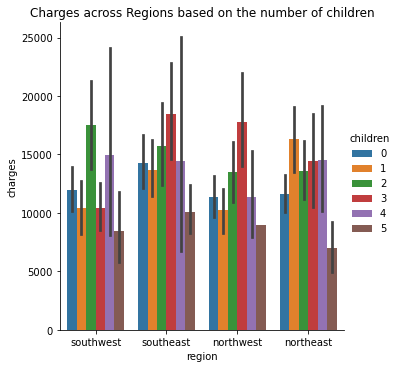

In [28]:
plt.figure(figsize=(7,7))
sns.catplot(x='region', y='charges', hue='children', data=med_cost, kind = 'bar')
plt.title('Charges across Regions based on the number of children')
plt.show()

From the catplot above, we can see that:

1) Families with two children pays the highest rate in the southwest, while family with five children pays the least.
2) Families with three children in the southeast pay the highest rate and those with five children the lowest rate.
3) While in the Northwest, families with three children pay the highest rate, while those with five children pay the least.
4) Families in the northeast pay more charges with one child and least with five children.

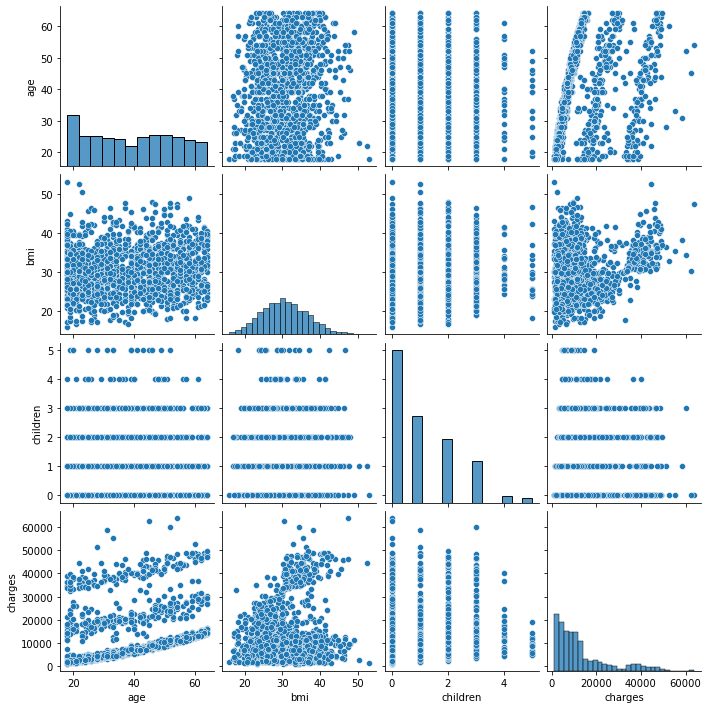

In [29]:
#pairplot showing the distribution of the variables
sns.pairplot(med_cost, diag_kind="hist")

From the pairplot, we can see that there's no correlation between children and age, children and bmi, children and charges. The distribution of bmi and age is normal. That of children and charges is skewed to the right.


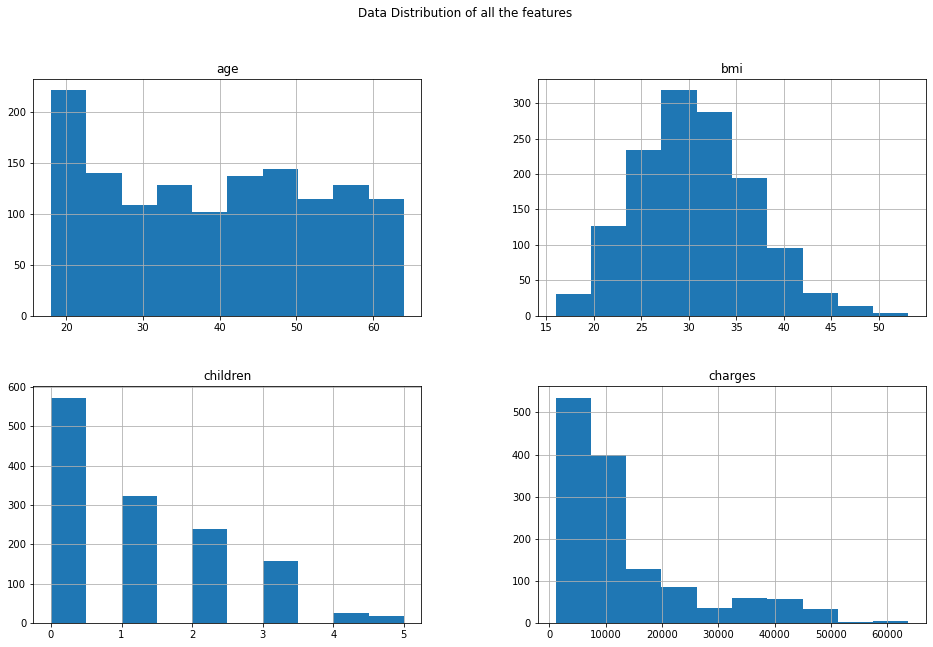

In [30]:
# Histogram containing all the columns
med_cost.hist(bins=10, figsize=(16,10))
plt.suptitle("Data Distribution of all the features")
plt.show()

From the distribution, we can see that the range of the ages is mostly 20. The charges and childfren columns are skewed to the right. The bmi column is normally distributed.

In [31]:
#import Label Encoder from sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

#Converted all categorical values to number
#Selects the columns that are not integer
columns = list(med_cost.select_dtypes(exclude=['float64','int64']))
le = LabelEncoder()
for i in columns:
 #print(i)
 med_cost[i] = le.fit_transform(med_cost[i])
med_cost.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

We converted the sex, smoker and region columns to int64 to enable us transform the data from categorical to numerical values.

In [32]:
#Viewing the dataset after encoding the categorical vavriables
med_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


Our categorical variables are now converted into numerical variables

Text(0.5, 1.0, 'Correlation Heatmap')

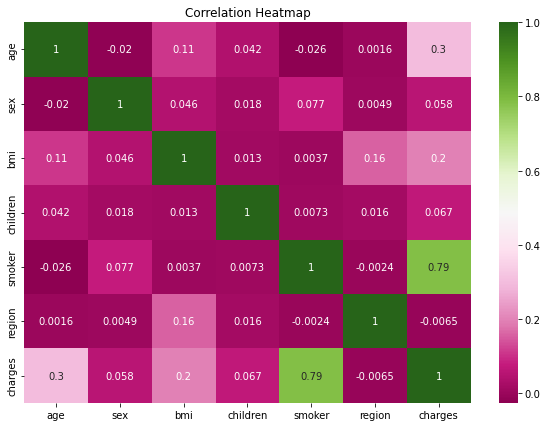

In [33]:
# Using heatmap to visualize the correlation between the features.

plt.figure(figsize=(10,7))
sns.heatmap(med_cost.corr(), annot=True, cmap='PiYG')
plt.title('Correlation Heatmap')


From the heatmap, we can see that there is a correlation between the charges and smokers, with a value of 0.79. I can see that  most of the relationships between variables are weak.

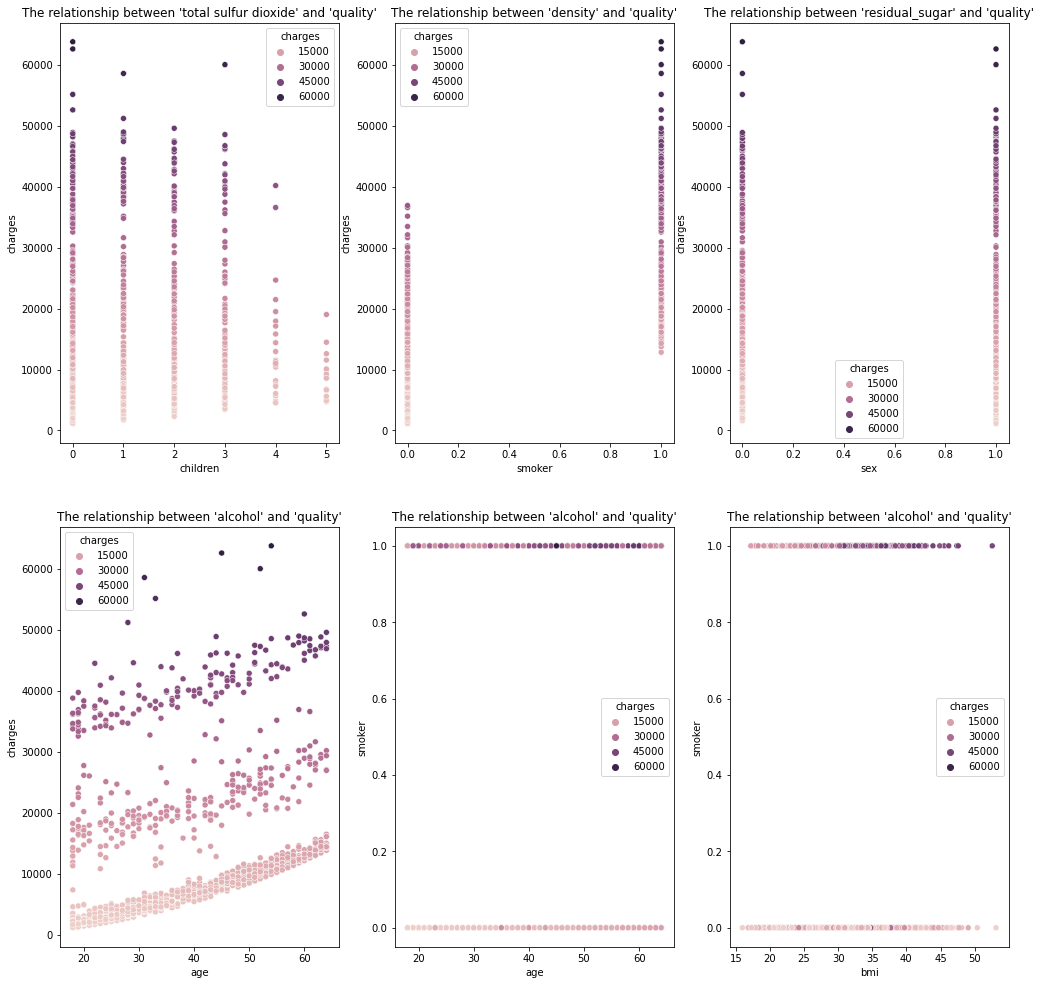

In [34]:
# These scatterplots are is used to visualize the relationships between variables
fig, axes = plt.subplots(2, 3, figsize=(17, 17)) 
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "children",
                y = "charges", hue = "charges",
                data = med_cost).set(title = "The relationship between 'total sulfur dioxide' and 'quality'");

sns.scatterplot(ax = axes[1],
                x = "smoker",
                y = "charges", hue = "charges",
                data = med_cost).set(title = "The relationship between 'density' and 'quality'");

sns.scatterplot(ax = axes[2],
                x = "sex",
                y = "charges", hue = "charges",
                data = med_cost).set(title = "The relationship between 'residual_sugar' and 'quality'");

sns.scatterplot(ax = axes[3],
                x = "age",
                y = "charges", hue = "charges",
                data = med_cost).set(title = "The relationship between 'alcohol' and 'quality'");

sns.scatterplot(ax = axes[4],
                x = "age",
                y = "smoker", hue = "charges",
                data = med_cost).set(title = "The relationship between 'alcohol' and 'quality'");

sns.scatterplot(ax = axes[5],
                x = "bmi",
                y = "smoker", hue = "charges",
                data = med_cost).set(title = "The relationship between 'alcohol' and 'quality'");

From the scatter plots above we can see that there are:

1) no correlation between: a) children and charges b) smoker and charges c) sex and charges d) age and smoker e) smoker and bmi

2) We can see that age and charges have high positive correlation.

<AxesSubplot:>

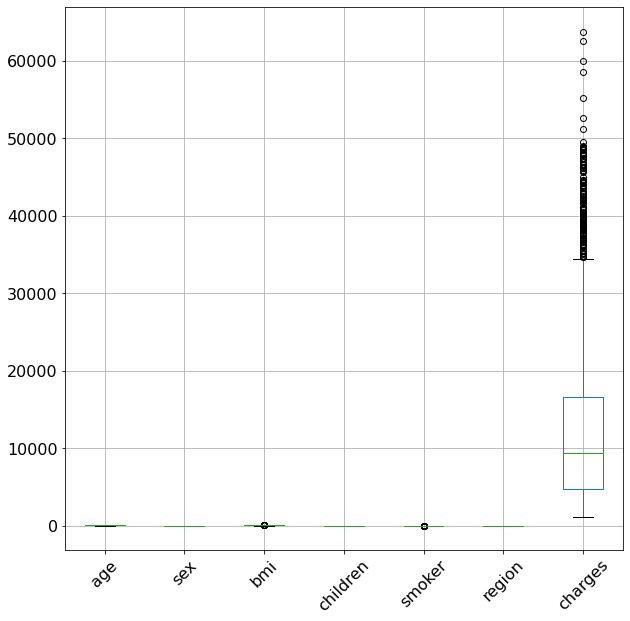

In [35]:
# Boxplot containing all the columns
med_cost.boxplot(column=med_cost.columns.tolist(), figsize=(10,10), grid=True, rot=45, fontsize=16)

We can see from the boxplot that there are more outliers in charges and bmi column. I tried removing them and the accuracy of my model dropped. I will keep this outliers as the data are important for my model.

In [36]:
#Dimension of our dataset after outliers have been removed
med_cost.shape

(1337, 7)

## Data Preprocessing

In [37]:
#Training & Testing
X = med_cost.drop(['charges'],axis = 1)
y = med_cost['charges']


We dropped the charges column from the list of independent variables and assigned it to y as our target variable. 

In [38]:
#checking the VIF value for multicollinearity between our variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X_input):
# Calculating VIF
    vif_df = pd.DataFrame()
    vif_df["Variables"] = X_input.columns
    vif_df["VIF Value"] = [variance_inflation_factor(X_input.values, i) for i in range(X_input.shape[1])]

    return(vif_df)
X = med_cost.iloc[:,:-1]
calc_vif(X)

,Variables,VIF Value
0,age,7.558005
1,sex,2.000028
2,bmi,10.378567
3,children,1.802019
4,smoker,1.257118
5,region,2.924245


From the result above, we can see that bmi has the highest VIF value. We shall drop the bmi variable.

In [39]:
#Dropping density(has highest vif value)
X = med_cost.drop(['bmi','charges'],axis=1)

calc_vif(X)

,Variables,VIF Value
0,age,3.381797
1,sex,1.870586
2,children,1.749673
3,smoker,1.241084
4,region,2.466223


Now our VIF value is okay

In [40]:
#Standardization of a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X)
X_test=sc.transform(X)
tabel_col = X.columns
x = pd.DataFrame(X_train, columns = tabel_col)
x


,age,sex,children,smoker,region
0,-1.440418,-1.009771,-0.909234,1.969660,1.343163
1,-1.511647,0.990324,-0.079442,-0.507702,0.438017
2,-0.799350,0.990324,1.580143,-0.507702,0.438017
3,-0.443201,0.990324,-0.909234,-0.507702,-0.467128
4,-0.514431,0.990324,-0.909234,-0.507702,-0.467128
...,...,...,...,...,...
1332,0.767704,0.990324,1.580143,-0.507702,-0.467128
1333,-1.511647,-1.009771,-0.909234,-0.507702,-1.372274
1334,-1.511647,-1.009771,-0.909234,-0.507702,0.438017
1335,-1.297958,-1.009771,-0.909234,-0.507702,1.343163


 We scaleed our variables so that they have a similar scale.

# Model Building

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1069, 5), (268, 5), (1069,), (268,))

We splitted our data in X_train, X_test, y_train and y_test. We shall be using the train variables for the purpose of training our model while the test variables will be used to validate the performance of our model. 80% of our data will be used to train the model while 20% will be used for model validation.

## 1. Gradient Boosting Regressor

In [42]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

ypred = gb.predict(X_test)
train_pred = gb.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred)
msqe = metrics.mean_squared_error(y_test, ypred)
r2_score = metrics.r2_score(y_test, ypred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_pred))
print('\n')


mean_absolute_error :  4323.999241620598
mean_squared_error  :  45279866.65147407
root_mean_absolute_error 6729.0316280631405
R2_score            :  0.7535870890152139
R2_score on training data :  0.7699310480253065




## 2. Random Forest Regressor

In [43]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
random_for= RandomForestRegressor()
random_for.fit(X_train, y_train)

y_pred = random_for.predict(X_test)
train_predrd = random_for.predict(X_train)
mse = metrics.mean_absolute_error(y_test, y_pred)
msqe = metrics.mean_squared_error(y_test, y_pred)
r2_score = metrics.r2_score(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')


mean_absolute_error :  4403.533020818543
mean_squared_error  :  52729744.580841705
root_mean_absolute_error 7261.524948717157
R2_score            :  0.7130448736154469
R2_score on training data :  0.9169441747750845




## 3. Decision Tree Regressor

In [44]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(X_train, y_train)
ypred_dc = dec_tree.predict(X_test)
train_preddc = dec_tree.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_dc)
msqe = metrics.mean_squared_error(y_test, ypred_dc)
r2_score = metrics.r2_score(y_test, ypred_dc)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_dc))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_preddc))
print('\n')

mean_absolute_error :  5022.327749628702
mean_squared_error  :  82932862.3588577
root_mean_absolute_error 9106.74817697611
R2_score            :  0.5486795889342257
R2_score on training data :  0.9532198762674741




## 4. Linear Regression

In [45]:
# Linear Regression 
from sklearn.linear_model import LinearRegression

lin_regre = LinearRegression()
lin_regre.fit(X_train, y_train)
ypred_lr = lin_regre.predict(X_test)
train_predlr = lin_regre.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_lr)
msqe = metrics.mean_squared_error(y_test, ypred_lr)
r2_score = metrics.r2_score(y_test, ypred_lr)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_lr))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predlr))
print('\n')

mean_absolute_error :  4134.053552899336
mean_squared_error  :  41642094.71270371
root_mean_absolute_error 6453.068627614595
R2_score            :  0.7733838339975004
R2_score on training data :  0.7047150262433898




## 5. Ridge

In [46]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha = 0.5)
Ridge.fit(X_train, y_train)
ypred_rd = Ridge.predict(X_test)
train_predrd = Ridge.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred_rd)
msqe = metrics.mean_squared_error(y_test, ypred_rd)
r2_score = metrics.r2_score(y_test, ypred_rd)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred_rd))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_predrd))
print('\n')

mean_absolute_error :  4136.00502279006
mean_squared_error  :  41659609.22964986
root_mean_absolute_error 6454.4255538080115
R2_score            :  0.7732885200439853
R2_score on training data :  0.7047148590281136




### Cross Validation Score for Gradient Boosting Regressor

In [47]:

from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(gb,x,y, cv=5, scoring = 'r2')
print(cv_score)
print(cv_score.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred)- cv_score.mean()}')

[0.72231184 0.68443845 0.71073014 0.70701201 0.7321044 ]
0.7113193662209438
The difference between the R2 score and the cross validation score is: 0.042267722794270046


### Cross Validation Score for Random Forest Regressor

In [48]:
cv_score1 = cross_val_score(random_for,x,y, cv=5, scoring = 'r2')
print(cv_score1)
print(cv_score1.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,y_pred)- cv_score1.mean()}')

[0.67874488 0.65261053 0.66431621 0.67090758 0.67687272]
0.6686903832199145
The difference between the R2 score and the cross validation score is: 0.04435449039553241


### Cross Validation Score Decision Tree Regressor

In [49]:
cv_score2 = cross_val_score(dec_tree,x,y, cv=5, scoring = 'r2')
print(cv_score2)
print(cv_score2.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_dc)- cv_score2.mean()}')

[0.50789527 0.48697792 0.44456296 0.41332804 0.51183142]
0.4729191216516406
The difference between the R2 score and the cross validation score is: 0.07576046728258518


### Cross Validation Score for Linear Regression

In [50]:
cv_score3 = cross_val_score(lin_regre,x,y, cv=5, scoring = 'r2')
print(cv_score3)
print(cv_score3.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_lr)- cv_score3.mean()}')

[0.73783439 0.68785925 0.74099271 0.70410127 0.73044379]
0.7202462811645578
The difference between the R2 score and the cross validation score is: 0.053137552832942636


### Cross Validation Score for Ridge

In [51]:
cv_score4 = cross_val_score(Ridge,x,y, cv=5, scoring = 'r2')
print(cv_score4)
print(cv_score4.mean())
print(f'The difference between the R2 score and the cross validation score is: {metrics.r2_score(y_test,ypred_rd)- cv_score4.mean()}')

[0.73784496 0.68791075 0.74093574 0.70412714 0.73042625]
0.7202489699865845
The difference between the R2 score and the cross validation score is: 0.0530395500574008


In [52]:
from sklearn.model_selection import GridSearchCV

model_best = GradientBoostingRegressor()

model_param = {
        "learning_rate": [0.01, 0.05, 0.1],
        "n_estimators": [10, 500, 1000],
        "max_depth": [3, 5, 7],
        "subsample": [0.8, 0.9, 1.0]
    }

In [53]:
gd_search = GridSearchCV(model_best, model_param, cv = 5)

gd_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 500, 1000],
                         'subsample': [0.8, 0.9, 1.0]})

In [54]:
#display the best parameters from the search
print("The best learning_rate is : " + str(gd_search.best_params_["learning_rate"]),
     "\nThe best n_estimators: " + str(gd_search.best_params_["n_estimators"]),
     "\nThe best max_depth: " + str(gd_search.best_params_["max_depth"]),
     "\nThe best subsample: " + str(gd_search.best_params_["subsample"]))

The best learning_rate is : 0.01 
The best n_estimators: 500 
The best max_depth: 3 
The best subsample: 0.8


In [55]:
# train the model with the selected parameters
New_model = GradientBoostingRegressor(n_estimators  = 500, max_depth = 3, learning_rate = 0.01, subsample = 0.8)

In [56]:

New_model.fit(X_train, y_train)

ypred = New_model.predict(X_test)
train_pred = New_model.predict(X_train)
mse = metrics.mean_absolute_error(y_test, ypred)
msqe = metrics.mean_squared_error(y_test, ypred)
r2_score = metrics.r2_score(y_test, ypred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, ypred))
print("mean_absolute_error : ", mse)
print("mean_squared_error  : ", msqe)
print("root_mean_absolute_error", rmse)
print("R2_score            : ", r2_score)
print("R2_score on training data : ", metrics.r2_score(y_train,train_pred))
print('\n')


mean_absolute_error :  4337.7143689346285
mean_squared_error  :  45140160.22015929
root_mean_absolute_error 6718.6427364579595
R2_score            :  0.7543473710338989
R2_score on training data :  0.7577240598324607




In [57]:
import pickle
# save the model to disk
filename = 'med_cost.sav'
pickle.dump(New_model, open(filename, 'wb'))

In [58]:
#prediction using our saved model
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test,y_test)
result

0.7543473710338989

In [59]:
accuracy_dataframe = pd.DataFrame([load_model.predict(X_test)[:],y_test[:]],index=['Predicted','Original'])
accuracy_dataframe

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
Predicted,10624.258318,7845.704649,12617.487467,24983.917443,6037.830327,11115.895286,26984.827567,3090.538481,8831.234018,11438.002623,...,8513.425447,12579.07676,25125.547389,37440.415262,16708.155039,14315.7183,14425.405775,7644.978455,44661.563146,10760.220502
Original,8688.858850,5708.867000,11436.738150,38746.355100,4463.205100,9304.701900,38511.628300,2150.469000,7345.726600,10264.442100,...,8059.679100,25333.33284,37465.343750,47055.532100,12949.155400,13831.1152,13887.204000,3925.758200,47403.880000,8534.671800


### Conclusion

We used different algorithms to train our data. From the difference between the r2 and cross validation scores obtained, we concluded that Gradient Boosting Regressor was the best model. We used the grid search algorithm to select the best parameters for our model and after training the model with the parameters, we observed a slight increase in the score obtained.